In [1]:
# Step 1: Install dependencies (only needed once in Colab)
!pip install seaborn

In [2]:
# Step 2: Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [4]:
# Step 3: Load dataset (GTZAN 30-sec features)
url = "/content/features_3_sec.csv"
data = pd.read_csv(url)

In [5]:
print("Dataset Shape:", data.shape)
print(data.head())

Dataset Shape: (9990, 60)
            filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0  blues.00000.0.wav   66149          0.335406         0.091048  0.130405   
1  blues.00000.1.wav   66149          0.343065         0.086147  0.112699   
2  blues.00000.2.wav   66149          0.346815         0.092243  0.132003   
3  blues.00000.3.wav   66149          0.363639         0.086856  0.132565   
4  blues.00000.4.wav   66149          0.335579         0.088129  0.143289   

    rms_var  spectral_centroid_mean  spectral_centroid_var  \
0  0.003521             1773.065032          167541.630869   
1  0.001450             1816.693777           90525.690866   
2  0.004620             1788.539719          111407.437613   
3  0.002448             1655.289045          111952.284517   
4  0.001701             1630.656199           79667.267654   

   spectral_bandwidth_mean  spectral_bandwidth_var  ...  mfcc16_var  \
0              1972.744388           117335.771563  ...   39.687145

In [6]:
# Step 4: Preprocess
X = data.drop(['label', 'filename'], axis=1)
y = data['label']

In [7]:
# Encode labels (genres)
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [8]:
# Scale features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [9]:
# Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Step 6: Train Model
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [11]:
# Step 7: Evaluate
y_pred = model.predict(X_test)
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=encoder.classes_))

✅ Accuracy: 0.8868868868868869

Classification Report:
               precision    recall  f1-score   support

       blues       0.89      0.88      0.88       208
   classical       0.93      0.98      0.96       203
     country       0.78      0.86      0.82       186
       disco       0.87      0.85      0.86       199
      hiphop       0.92      0.88      0.90       218
        jazz       0.87      0.92      0.90       192
       metal       0.88      0.96      0.92       204
         pop       0.91      0.96      0.93       180
      reggae       0.92      0.87      0.90       211
        rock       0.88      0.73      0.80       197

    accuracy                           0.89      1998
   macro avg       0.89      0.89      0.89      1998
weighted avg       0.89      0.89      0.89      1998



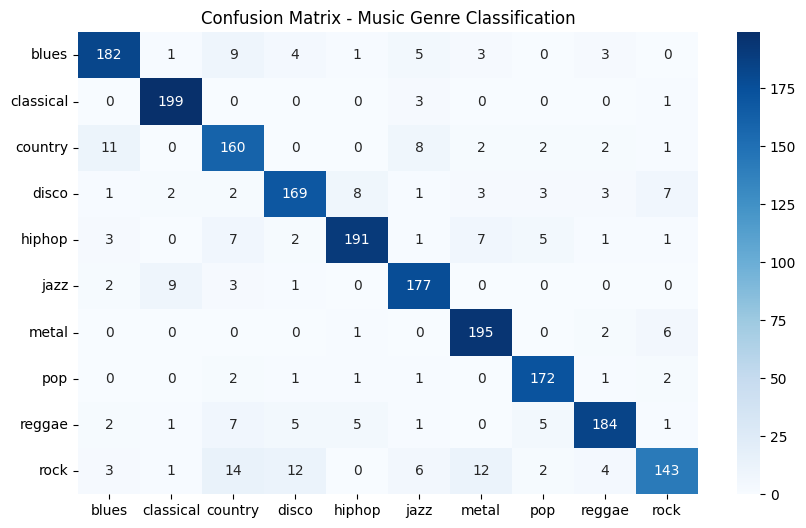

In [12]:
# Step 8: Confusion Matrix
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d",
            xticklabels=encoder.classes_, yticklabels=encoder.classes_, cmap="Blues")
plt.title("Confusion Matrix - Music Genre Classification")
plt.show()

In [13]:
# Step 9: Test with a sample
sample = X_test[5].reshape(1,-1)
pred_genre = encoder.inverse_transform(model.predict(sample))
print("🎵 Predicted Genre:", pred_genre[0])

🎵 Predicted Genre: jazz
